# ===============================================================

# LIVER DISEASE PREDICTION DETECTION

# ===============================================================

# 

## importing the libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## loading the dataset

In [2]:
dataset = pd.read_csv(
    "/home/dhanola/KUBUNTU/DATASETS/CSV_DATASETS/indian_liver_patient.csv")

dataset.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


## checking datasets for null and type mismatch

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## preprocessing the dataset

In [4]:
# filling the null values of 'Albumin_and_Globulin_Ratio' column with its mean

dataset['Albumin_and_Globulin_Ratio'].fillna(
    dataset['Albumin_and_Globulin_Ratio'].mean(), inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


## converting each non-numeric data to numeric for visualization

In [5]:
dataset = pd.get_dummies(dataset)

## visualzing each attribute

In [6]:
def draw_hist(dataset, rows, cols):
    fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 12))
    names = dataset.columns.values
    counter = 0
    for i in range(rows):
        for j in range(cols):
            if counter >= len(names):
                break
            name = names[counter]
            sns.distplot(a=dataset[name], ax=axes[i, j])

            counter += 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

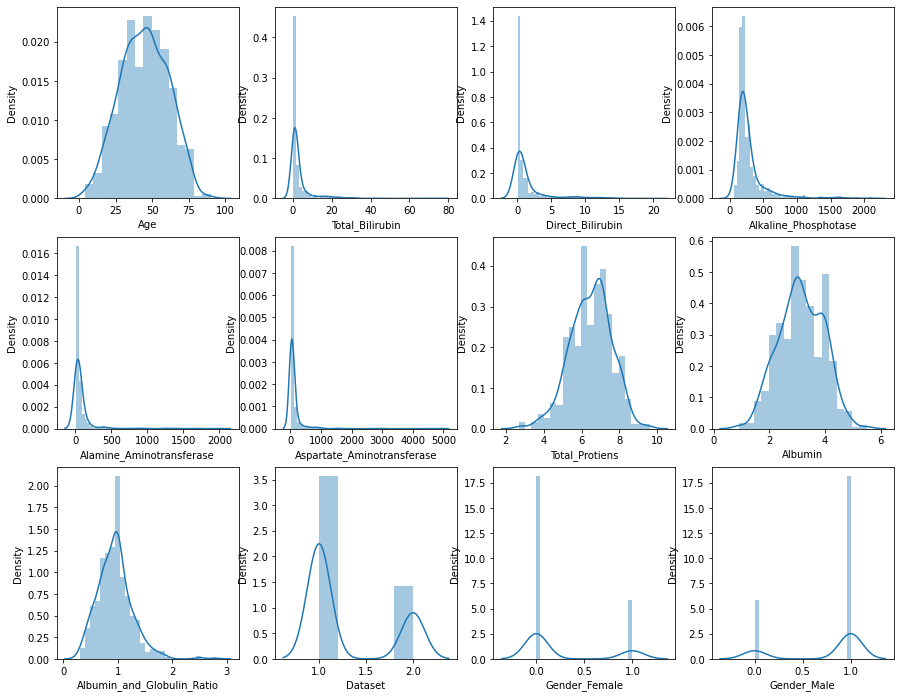

In [7]:
draw_hist(dataset=dataset, rows=3, cols=4)

## visualizing the correlation between the attributes

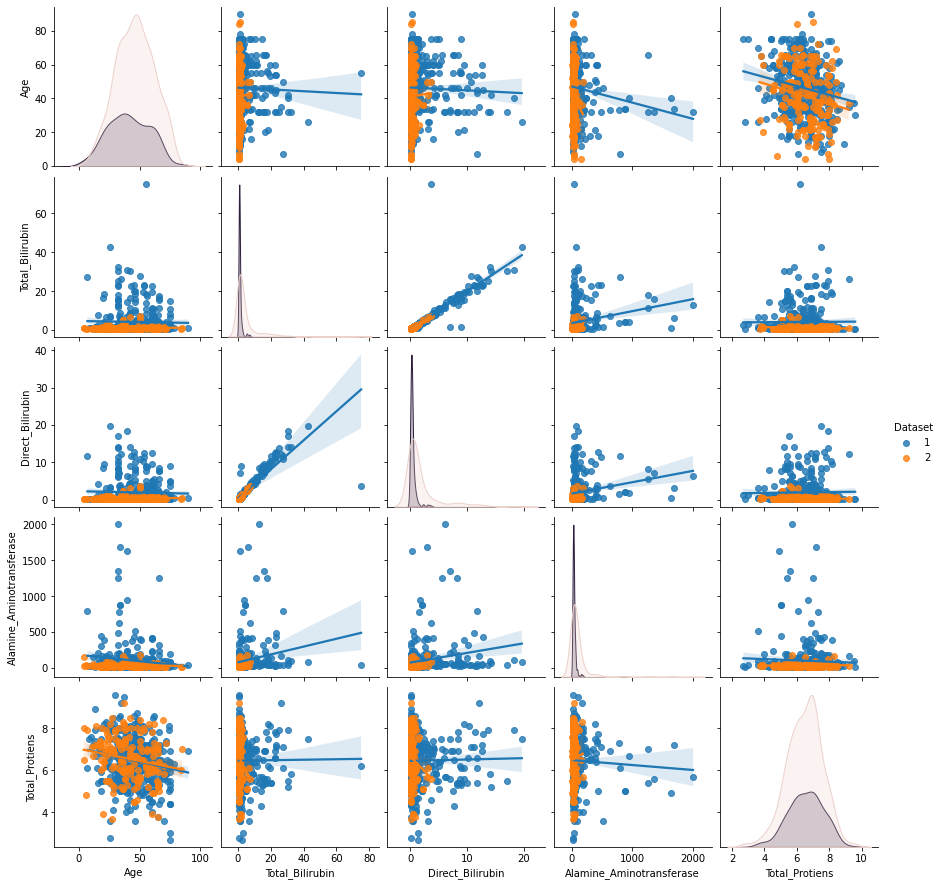

In [8]:
selected_pair_cols = [
    'Age', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alamine_Aminotransferase',
    'Total_Protiens', 'Dataset'
]
sns.pairplot(data=dataset[selected_pair_cols], hue="Dataset", kind='reg')

## using the correlation matrix

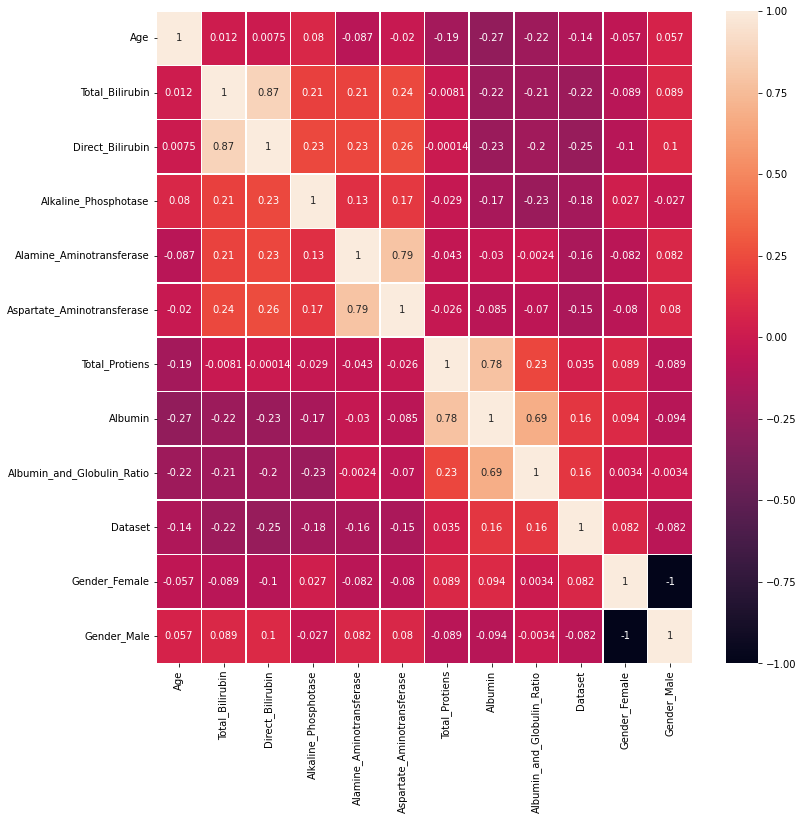

In [9]:
corr_matrix = dataset.corr()
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, ax=ax)

## creating the model

### craete train and test dataset

In [10]:
X = dataset.drop('Dataset', axis=1)  # data
y = dataset['Dataset']  # target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.3,
                                                    random_state=42)

## list of model to be used

In [12]:
models = []
models.append(("LR", LogisticRegression()))
models.append(("KNN", KNeighborsClassifier(n_neighbors=85)))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))

## training and fillting model and predicting result for each

In [13]:
for name, model in models:

    clf = model

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    print(10 * "=", "{} Results for".format(name).upper(), 10 * "=")
    print("Accuracy Score:{:0.2f}".format(accuracy_score(y_test, y_pred)))
    print("Confusion Matrix:\n{}".format(confusion_matrix(y_test, y_pred)))
    print("Classification Report:\n{}".format(
        classification_report(y_test, y_pred)))
    print(30 * "=")

========== LR RESULTS FOR ==========
Accuracy Score:0.71
Confusion Matrix:
[[112  13]
 [ 37  13]]
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.90      0.82       125
           2       0.50      0.26      0.34        50

    accuracy                           0.71       175
   macro avg       0.63      0.58      0.58       175
weighted avg       0.68      0.71      0.68       175

========== KNN RESULTS FOR ==========
Accuracy Score:0.72
Confusion Matrix:
[[123   2]
 [ 47   3]]
Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.98      0.83       125
           2       0.60      0.06      0.11        50

    accuracy                           0.72       175
   macro avg       0.66      0.52      0.47       175
weighted avg       0.69      0.72      0.63       175

========== DT RESULTS FOR ==========
Accuracy Score:0.66
Confusion Matrix:
[[96 29]
 [30 20]]
Classific

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Using the cross validation

In [14]:
for name, model in models:
    kfold = KFold(n_splits=5)
    cv_result = cross_val_score(model, X, y, cv=kfold, scoring="accuracy")
    print(("{} cross validation result of model:{:0.2f}".format(
        name, cv_result.mean())))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR cross validation result of model:0.71
KNN cross validation result of model:0.71
DT cross validation result of model:0.63
SVM cross validation result of model:0.71


## Finding the Best Classifier with GridSearchCV 

In [15]:
params_clfs = list()

svm_params = [{
    'kernel': ['rbf'],
    'gamma': [1e-3, 1e-4]
}, {
    'kernel': ['linear'],
    'C': [1, 10, 100, 1000]
}]
params_clfs.append((SVC(), svm_params))

lr_params = {'penalty': ['l1', 'l2'], 'C': np.logspace(0, 4, 10)}
params_clfs.append((LogisticRegression(), lr_params))

clf = DecisionTreeClassifier()
dt_params = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_leaf': [1],
    'random_state': [123]
}
params_clfs.append((DecisionTreeClassifier(), dt_params))

********************************************************************************
SVC sklearn result for GridSearch for svc
best params:{'C': 10, 'kernel': 'linear'}
average test result:0.72
best parameter result:0.72
Confusion Matrix:
[[117   8]
 [ 41   9]]


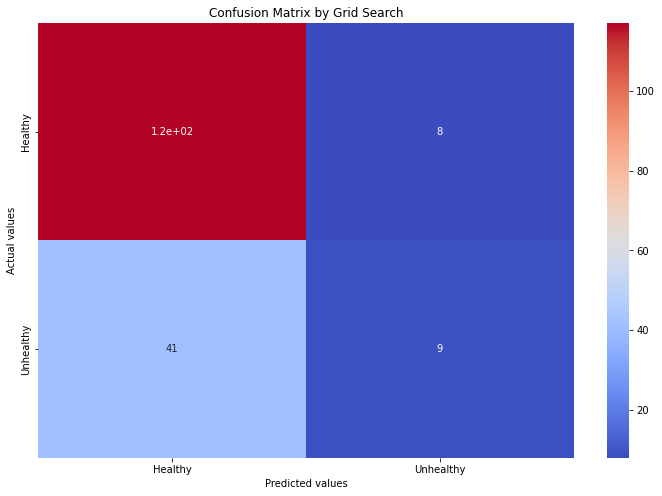

Classification report:
              precision    recall  f1-score   support

           1       0.74      0.94      0.83       125
           2       0.53      0.18      0.27        50

    accuracy                           0.72       175
   macro avg       0.63      0.56      0.55       175
weighted avg       0.68      0.72      0.67       175

********************************************************************************


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

********************************************************************************
LogisticRegression sklearn result for GridSearch for svc
best params:{'C': 21.544346900318832, 'penalty': 'l2'}
average test result:nan
best parameter result:0.69
Confusion Matrix:
[[108  17]
 [ 38  12]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


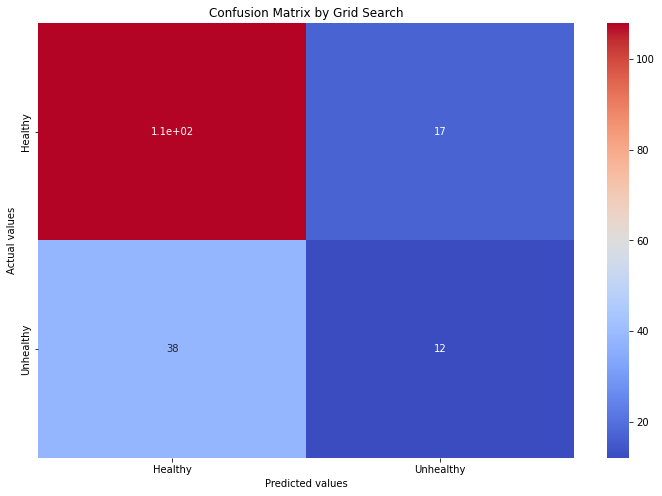

Classification report:
              precision    recall  f1-score   support

           1       0.74      0.86      0.80       125
           2       0.41      0.24      0.30        50

    accuracy                           0.69       175
   macro avg       0.58      0.55      0.55       175
weighted avg       0.65      0.69      0.66       175

********************************************************************************
********************************************************************************
DecisionTreeClassifier sklearn result for GridSearch for svc
best params:{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 13, 'random_state': 123}
average test result:0.66
best parameter result:0.61
Confusion Matrix:
[[92 33]
 [36 14]]


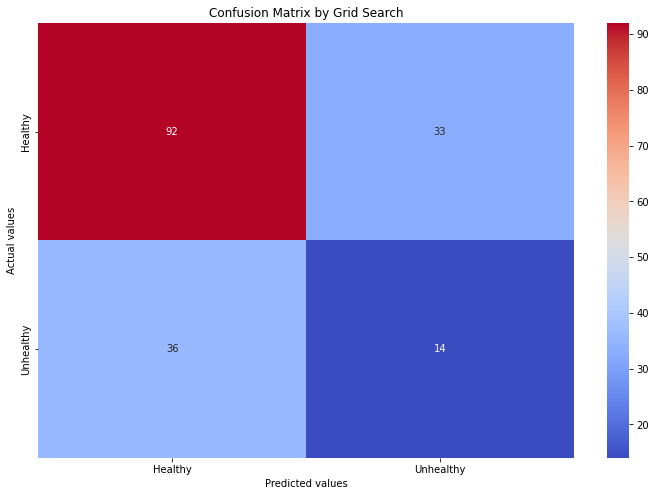

Classification report:
              precision    recall  f1-score   support

           1       0.72      0.74      0.73       125
           2       0.30      0.28      0.29        50

    accuracy                           0.61       175
   macro avg       0.51      0.51      0.51       175
weighted avg       0.60      0.61      0.60       175

********************************************************************************


In [16]:
for clf, param in params_clfs:

    grid_search = GridSearchCV(clf, param, cv=5)
    grid_search.fit(X_train, y_train)
    print((80 * "*"))
    print(("{} sklearn result for GridSearch for svc".format(
        clf.__class__.__name__)))
    print(("best params:{}".format(grid_search.best_params_)))
    test_means = grid_search.cv_results_['mean_test_score']
    print(("average test result:{:.2f}".format(np.mean(test_means))))
    y_pred = grid_search.predict(X_test)
    print(
        ("best parameter result:{:.2f}".format(accuracy_score(y_test,
                                                              y_pred))))
    print(("Confusion Matrix:\n{}".format(confusion_matrix(y_test, y_pred))))
    plt.figure(figsize=(12, 8))
    sns.heatmap(data=confusion_matrix(y_test, y_pred),
                annot=True,
                cmap="coolwarm",
                xticklabels=['Healthy', 'Unhealthy'],
                yticklabels=['Healthy', 'Unhealthy'])
    plt.xlabel('Predicted values')
    plt.ylabel('Actual values')
    plt.title('Confusion Matrix by Grid Search')
    plt.show()
    print(("Classification report:\n{}".format(
        classification_report(y_test, y_pred))))
    print((80 * "*"))

### from above we say that classifier gives best result

# 

# ===============================================================

# THE END

# ===============================================================